<a href="https://colab.research.google.com/github/victoriamaccari/proyecto/blob/master/GrowthDJ_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preproceso de datos






#####carga de datos



In [1]:
import pandas as pd

In [2]:
url= "https://raw.githubusercontent.com/victoriamaccari/proyecto/master/GrowthDJ.csv"

In [3]:
df= pd.read_csv(url)

In [4]:
df.head(10)

,Unnamed: 0,oil,inter,oecd,gdp60,gdp85,gdpgrowth,popgrowth,invest,school,literacy60
0,1,no,yes,no,2485.0,4371.0,4.8,2.6,24.1,4.5,10.0
1,2,no,no,no,1588.0,1171.0,0.8,2.1,5.8,1.8,5.0
2,3,no,no,no,1116.0,1071.0,2.2,2.4,10.8,1.8,5.0
3,4,no,yes,no,959.0,3671.0,8.6,3.2,28.3,2.9,NaN
4,5,no,no,no,529.0,857.0,2.9,0.9,12.7,0.4,2.0
5,6,no,no,no,755.0,663.0,1.2,1.7,5.1,0.4,14.0
6,7,no,yes,no,889.0,2190.0,5.7,2.1,12.8,3.4,19.0
7,8,no,no,no,838.0,789.0,1.5,1.7,10.5,1.4,7.0
8,9,no,no,no,908.0,462.0,-0.9,1.9,6.9,0.4,6.0
9,10,no,no,no,1009.0,2624.0,6.2,2.4,28.8,3.8,16.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  121 non-null    int64  
 1   oil         121 non-null    object 
 2   inter       121 non-null    object 
 3   oecd        121 non-null    object 
 4   gdp60       116 non-null    float64
 5   gdp85       108 non-null    float64
 6   gdpgrowth   117 non-null    float64
 7   popgrowth   107 non-null    float64
 8   invest      121 non-null    float64
 9   school      118 non-null    float64
 10  literacy60  103 non-null    float64
dtypes: float64(7), int64(1), object(3)
memory usage: 10.5+ KB


In [6]:
#elimino columna Unnamed:0
df.drop(df.columns[[0]], axis='columns', inplace=True)

In [7]:
df.head(10)

,oil,inter,oecd,gdp60,gdp85,gdpgrowth,popgrowth,invest,school,literacy60
0,no,yes,no,2485.0,4371.0,4.8,2.6,24.1,4.5,10.0
1,no,no,no,1588.0,1171.0,0.8,2.1,5.8,1.8,5.0
2,no,no,no,1116.0,1071.0,2.2,2.4,10.8,1.8,5.0
3,no,yes,no,959.0,3671.0,8.6,3.2,28.3,2.9,NaN
4,no,no,no,529.0,857.0,2.9,0.9,12.7,0.4,2.0
5,no,no,no,755.0,663.0,1.2,1.7,5.1,0.4,14.0
6,no,yes,no,889.0,2190.0,5.7,2.1,12.8,3.4,19.0
7,no,no,no,838.0,789.0,1.5,1.7,10.5,1.4,7.0
8,no,no,no,908.0,462.0,-0.9,1.9,6.9,0.4,6.0
9,no,no,no,1009.0,2624.0,6.2,2.4,28.8,3.8,16.0


In [8]:
print(df['gdp60'].describe())


count      116.000000
mean      3681.818966
std       7492.877637
min        383.000000
25%        973.250000
50%       1962.000000
75%       4274.500000
max      77881.000000
Name: gdp60, dtype: float64


#####Valores perdidos

In [9]:
#Comprobar si hay valores perdidos
pd.isnull(df).any()



oil           False
inter         False
oecd          False
gdp60          True
gdp85          True
gdpgrowth      True
popgrowth      True
invest        False
school         True
literacy60     True
dtype: bool

In [10]:
#Total de valores perdidos por columna
df.isnull().sum()

oil            0
inter          0
oecd           0
gdp60          5
gdp85         13
gdpgrowth      4
popgrowth     14
invest         0
school         3
literacy60    18
dtype: int64

In [11]:
#Metodo fillna, asigna el valor previo o el ultimo valor valido
df.fillna(method='ffill', inplace=True)

In [12]:
#Compruebo que no queden valores perdidos
pd.isnull(df).any()

oil           False
inter         False
oecd          False
gdp60         False
gdp85         False
gdpgrowth     False
popgrowth     False
invest        False
school        False
literacy60    False
dtype: bool

In [13]:
#Comprobar si hay valores duplicados, filtro para que me muestre True si hay duplicados
df.duplicated(keep=False)

0      False
1      False
2      False
3      False
4      False
       ...  
116    False
117    False
118    False
119    False
120    False
Length: 121, dtype: bool

In [14]:
#Observo los datos
import matplotlib.pyplot as plt


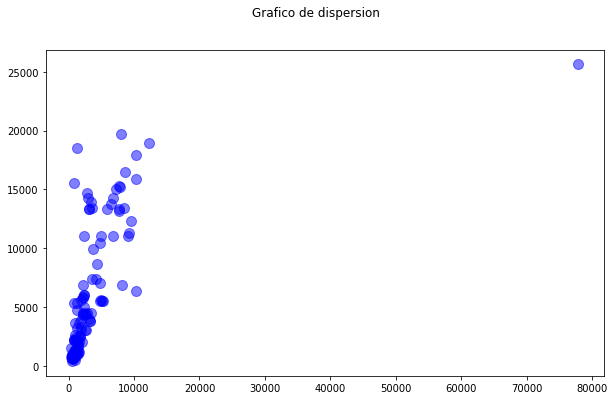

In [15]:
fig, ax = plt.subplots(1, figsize=(10, 6))
fig.suptitle('Grafico de dispersion')

ax.scatter(df['gdp60'], df['gdp85'],
            color="blue",    # Color of the dots
            s=100,           # Size of the dots
            alpha=0.5,       # Alpha/transparency of the dots (1 is opaque, 0 is transparent)
            linewidths=1)    # Size of edge around the dots

# Show the plot
plt.show()

In [16]:
summary = df.describe()
print(summary)

              gdp60         gdp85  ...      school  literacy60
count    121.000000    121.000000  ...  121.000000  121.000000
mean    3587.983471   5857.661157  ...    5.537190   48.256198
std     7349.898268   5600.090048  ...    3.502693   35.646302
min      383.000000    412.000000  ...    0.400000    1.000000
25%      978.000000   1237.000000  ...    2.400000   15.000000
50%     1939.000000   3775.000000  ...    4.900000   39.000000
75%     3766.000000   9903.000000  ...    8.200000   84.000000
max    77881.000000  25635.000000  ...   12.100000  100.000000

[8 rows x 7 columns]


(array([ 1.,  5., 14., 16., 30., 21., 17., 10.,  4.,  3.]),
 array([-0.9 ,  0.11,  1.12,  2.13,  3.14,  4.15,  5.16,  6.17,  7.18,
         8.19,  9.2 ]),
 <a list of 10 Patch objects>)

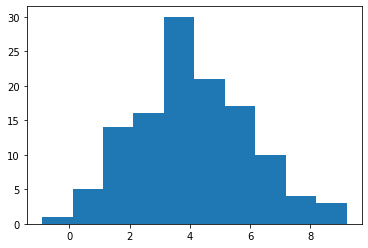

In [17]:
plt.hist(df["gdpgrowth"])

{'boxes': [<matplotlib.lines.Line2D at 0x7f10517e5320>],
 'caps': [<matplotlib.lines.Line2D at 0x7f10517e5d30>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f10517f77f0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f10517f7470>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f10517e5630>,
  <matplotlib.lines.Line2D at 0x7f10517e59b0>]}

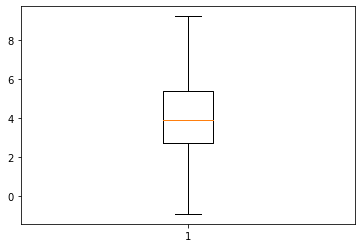

In [18]:
plt.boxplot(df['gdpgrowth'])

{'boxes': [<matplotlib.lines.Line2D at 0x7f10517c6898>],
 'caps': [<matplotlib.lines.Line2D at 0x7f10517522e8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f1051752d68>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f10517529e8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f10517c6ba8>,
  <matplotlib.lines.Line2D at 0x7f10517c6f28>]}

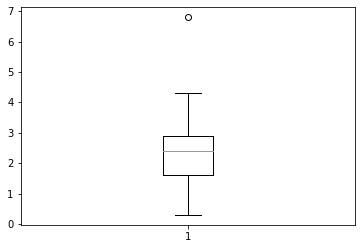

In [19]:
plt.boxplot(df['popgrowth'])

##### Deteccion de outliers

In [20]:
#Deteccion de outliers
#IQR para cada columna
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

gdp60         2788.0
gdp85         8666.0
gdpgrowth        2.7
popgrowth        1.3
invest          12.1
school           5.8
literacy60      69.0
dtype: float64


In [21]:
BI=(df < (Q1 - 1.5 * IQR)) 
print(BI)

     gdp60  gdp85  gdpgrowth  inter  ...   oecd    oil  popgrowth  school
0    False  False      False  False  ...  False  False      False   False
1    False  False      False  False  ...  False  False      False   False
2    False  False      False  False  ...  False  False      False   False
3    False  False      False  False  ...  False  False      False   False
4    False  False      False  False  ...  False  False      False   False
..     ...    ...        ...    ...  ...    ...    ...        ...     ...
116  False  False      False  False  ...  False  False      False   False
117  False  False      False  False  ...  False  False      False   False
118  False  False      False  False  ...  False  False      False   False
119  False  False      False  False  ...  False  False      False   False
120  False  False      False  False  ...  False  False      False   False

[121 rows x 10 columns]


In [22]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
BS=(df > (Q3 + 1.5 * IQR))
print(BS)

     gdp60  gdp85  gdpgrowth  inter  invest  literacy60   oecd    oil  \
0    False  False      False  False   False       False  False  False   
1    False  False      False  False   False       False  False  False   
2    False  False      False  False   False       False  False  False   
3    False  False      False  False   False       False  False  False   
4    False  False      False  False   False       False  False  False   
5    False  False      False  False   False       False  False  False   
6    False  False      False  False   False       False  False  False   
7    False  False      False  False   False       False  False  False   
8    False  False      False  False   False       False  False  False   
9    False  False      False  False   False       False  False  False   
10   False  False      False  False   False       False  False  False   
11   False  False      False  False   False       False  False  False   
12   False  False      False  False   False       F

In [23]:
#Quito los outliers
df_out = df[~((df < (Q1 - 1.5 * IQR))).any(axis=1)]
df_out.shape

(121, 10)

In [24]:
#Quito los outliers
df_out2 = df[~((df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_out2.shape

(110, 10)

{'boxes': [<matplotlib.lines.Line2D at 0x7f10504b64e0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f10504b6ef0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f10504c39b0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f10504c3630>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f10504b67f0>,
  <matplotlib.lines.Line2D at 0x7f10504b6b70>]}

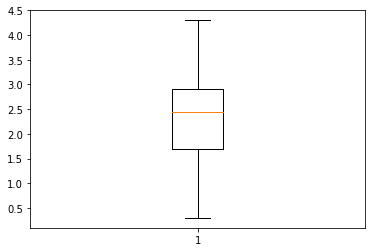

In [25]:
#Compruebo que en esta columna ya no hay valores outliers
plt.boxplot(df_out2['popgrowth'])

In [26]:
#Se eliminaron 11 filas con valores outliers
summary = df_out2.describe()
print(summary)

             gdp60         gdp85   gdpgrowth   popgrowth      invest  \
count   110.000000    110.000000  110.000000  110.000000  110.000000   
mean   2364.263636   5023.263636    4.211818    2.250909   17.682727   
std    1963.342356   4890.696790    1.958268    0.908143    7.793209   
min     383.000000    412.000000   -0.900000    0.300000    4.100000   
25%     917.000000   1193.750000    2.825000    1.700000   12.000000   
50%    1620.500000   3150.000000    4.050000    2.450000   17.150000   
75%    3145.000000   6042.000000    5.500000    2.900000   23.350000   
max    7938.000000  19723.000000    9.200000    4.300000   36.900000   

           school  literacy60  
count  110.000000  110.000000  
mean     5.179091   44.272727  
std      3.393007   34.556405  
min      0.400000    1.000000  
25%      2.325000   13.250000  
50%      4.450000   32.000000  
75%      7.975000   74.500000  
max     12.100000  100.000000  


In [27]:
#Bucle para eliminar valores outliers, no funciono falta modificar el exclude
def boxplot_outlier_removal(df):
  for col in df.columns:
        if col not in exclude:
            # get Q1, Q3 & Interquantile Range
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            # define outliers and remove them
            filter_ = (df[col] > Q1 - 1.5 * IQR) & (df[col] < Q3 + 1.5 *IQR)
            df = df[filter_]
  after = len(df)
  diff = before-after
  percent = diff/before*100
  print('{} ({:.2f}%) outliers removed'.format(diff, percent))
  return df


In [28]:
#from sklearn.preprocessing import StandardScaler
#scaler=StandardScaler()
#scaled_datos=scaler.fit_transform(df_out2.iloc[:,[3,4,5,6,7,8,9]].values)
#print(scaled_datos)


#####Normalizacion de datos

In [29]:
from sklearn import preprocessing 
min_max_scaler = preprocessing.MinMaxScaler()
datanorm = min_max_scaler.fit_transform(df_out2.iloc[:,[3,4,5,6,7,8]].values)
print(datanorm)

[[0.27822634 0.20501269 0.56435644 0.575      0.6097561  0.35042735]
 [0.15949702 0.03930402 0.16831683 0.45       0.05182927 0.11965812]
 [0.09702184 0.03412563 0.30693069 0.525      0.20426829 0.11965812]
 [0.0762409  0.16876392 0.94059406 0.725      0.73780488 0.21367521]
 [0.01932495 0.02304386 0.37623762 0.15       0.26219512 0.        ]
 [0.04923891 0.01299777 0.20792079 0.35       0.0304878  0.        ]
 [0.06697551 0.09207188 0.65346535 0.45       0.2652439  0.25641026]
 [0.06022502 0.01952255 0.23762376 0.35       0.19512195 0.08547009]
 [0.0694904  0.0025892  0.         0.4        0.08536585 0.        ]
 [0.08285903 0.11454611 0.7029703  0.525      0.75304878 0.29059829]
 [0.06935804 0.09051836 0.68316832 0.55       0.37195122 0.56410256]
 [0.0198544  0.01014966 0.36633663 0.5        0.03963415 0.05982906]
 [0.12230311 0.25570918 0.78217822 0.275      0.54878049 0.18803419]
 [0.05506287 0.25570918 0.44554455 0.275      0.42682927 0.09401709]
 [0.08285903 0.01631195 0.18811881

# Dendrograma

In [30]:
#algortimo aglomerativo jerarquico - dendrogramas
import scipy.cluster.hierarchy as sch
from matplotlib import pyplot as plt

#datos=df_out2.iloc[:,[3,4,5,6,7,8]].values
#datos


In [31]:
clustering_jerarquico= sch.linkage(datanorm, 'ward')


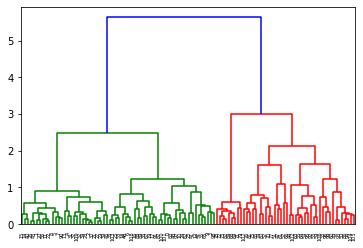

In [32]:
dendrogram=sch.dendrogram(clustering_jerarquico)

In [33]:
#realizo el corte en 
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(clustering_jerarquico, t=2, criterion='distance')

In [34]:
print(clusters)

[2 1 1 2 1 1 2 1 1 2 2 1 2 1 1 1 2 2 2 2 1 1 1 2 2 2 1 1 1 1 1 1 1 5 1 2 2
 1 2 1 1 2 2 1 5 1 2 4 2 5 5 4 4 5 5 5 1 4 2 5 5 4 2 5 5 2 4 2 3 3 4 3 3 3
 4 4 4 4 3 3 4 4 3 2 3 4 5 2 2 2 1 2 5 5 5 5 5 2 2 5 2 2 5 2 5 5 5 4 2 1]


In [35]:
df_out2['clustering jerarquico']=clusters

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


#####Nueva columna con datos etiquetados

In [36]:
#Visualizar las filas que estan en cada cluster
df_out2[df_out2['clustering jerarquico'] == 5]

,oil,inter,oecd,gdp60,gdp85,gdpgrowth,popgrowth,invest,school,literacy60,clustering jerarquico
33,no,yes,no,4768.0,7064.0,3.9,2.3,21.6,3.0,57.0,5
44,yes,no,no,1224.0,2107.0,1.6,2.8,30.0,12.1,8.0,5
49,yes,no,no,3606.0,7400.0,6.3,3.4,18.4,6.5,16.0,5
50,yes,no,no,4916.0,5626.0,3.8,3.2,16.2,7.4,18.0,5
53,no,yes,no,2183.0,4312.0,5.4,2.7,17.6,10.8,32.0,5
54,no,yes,no,1285.0,4775.0,7.9,2.7,22.3,10.2,71.0,5
56,no,yes,no,2154.0,5788.0,7.1,3.2,23.2,7.3,53.0,5
60,no,yes,no,1668.0,2430.0,4.5,3.0,14.9,10.6,72.0,5
61,yes,no,no,6731.0,11057.0,6.1,4.1,12.8,3.1,3.0,5
64,no,yes,no,2382.0,6042.0,6.7,3.0,15.9,8.8,30.0,5


In [37]:
#Visualizo la nueva columna 'clustering jerarquico' con los datos etiquetados.
df_out2.head(10)

,oil,inter,oecd,gdp60,gdp85,gdpgrowth,popgrowth,invest,school,literacy60,clustering jerarquico
0,no,yes,no,2485.0,4371.0,4.8,2.6,24.1,4.5,10.0,2
1,no,no,no,1588.0,1171.0,0.8,2.1,5.8,1.8,5.0,1
2,no,no,no,1116.0,1071.0,2.2,2.4,10.8,1.8,5.0,1
3,no,yes,no,959.0,3671.0,8.6,3.2,28.3,2.9,5.0,2
4,no,no,no,529.0,857.0,2.9,0.9,12.7,0.4,2.0,1
5,no,no,no,755.0,663.0,1.2,1.7,5.1,0.4,14.0,1
6,no,yes,no,889.0,2190.0,5.7,2.1,12.8,3.4,19.0,2
7,no,no,no,838.0,789.0,1.5,1.7,10.5,1.4,7.0,1
8,no,no,no,908.0,462.0,-0.9,1.9,6.9,0.4,6.0,1
9,no,no,no,1009.0,2624.0,6.2,2.4,28.8,3.8,16.0,2


#####Coeficiente de Silhouette

In [38]:
from sklearn import metrics
n_clusters_ = len(set(clusters))
print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(datanorm, clusters))

Estimated number of clusters: 5
Silhouette Coefficient: 0.235


# PCA ANALISIS DE COMPONENTES PRINCIPALES

In [39]:
#PCA ANALISIS DE COMPONENTES PRINCIPALES
from sklearn import preprocessing 
scaler = preprocessing.StandardScaler()
states = scaler.fit_transform(df_out2.iloc[:,[3,4,5,6,7,8]].values)

In [40]:
#2. PCA Estimation
from sklearn.decomposition import PCA
estimator = PCA (n_components = 3)
X_pca = estimator.fit_transform(states)
X_pca

array([[ 0.18268288, -0.60466336, -0.07249485],
       [-1.97837542,  1.75981653,  0.37832512],
       [-1.78740718,  0.83158197,  0.08547769],
       [-0.10047898, -2.69468232, -0.99274523],
       [-1.49789826,  1.43561608, -1.54096422],
       [-2.30292825,  1.8275464 , -0.32175059],
       [-1.00317344, -0.44944139, -0.7832484 ],
       [-1.79277435,  1.53462763, -0.40859671],
       [-2.42068406,  2.47041385,  0.2353235 ],
       [ 0.00726887, -1.30011712, -1.03338699],
       [-0.40725888, -1.02243019, -0.24529804],
       [-2.30453498,  0.77783912, -0.1617904 ],
       [ 0.18840634, -0.7030959 , -1.84555627],
       [-0.6017639 ,  0.69436314, -1.28424728],
       [-1.62091693,  1.31110574,  0.58250568],
       [-1.24253966,  1.21379932, -0.30510219],
       [-1.85316346, -1.52132913,  1.0356915 ],
       [-1.432827  , -1.03300861,  0.17636942],
       [-1.23380569, -0.7508146 , -1.39957795],
       [-1.23790374, -0.33544524,  0.04664924],
       [-1.88938655,  1.3606277 ,  0.297

In [41]:
print(estimator.explained_variance_ratio_) 

[0.52737763 0.22211364 0.09310427]


TypeError: ignored

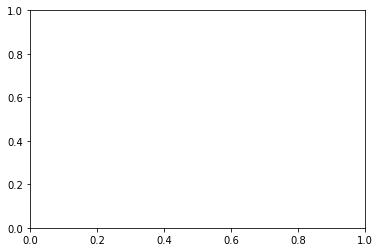

In [42]:
names= df.columns.values
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
for i in range(len(X_pca)):
    plt.text(X_pca[i][0], X_pca[i][1],X_pca[i][2], names[i]) 


plt.xlim(-2, 6)
plt.ylim(-1, 1.5)
ax.grid(True)
fig.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
for i in range(len(X_pca)):
    plt.text(X_pca[i][0], X_pca[i][1], names[i]) 


plt.xlim(-2, 6)
plt.ylim(-1, 1.5)
ax.grid(True)
fig.tight_layout()
plt.show()

# K-MEANS

In [ ]:
#k-means

# parameters
init = 'random' # initialization method 

# to run 10 times with different random centroids 
# to choose the final model as the one with the lowest SSE
iterations = 10

# maximum number of iterations for each single run
max_iter = 300 

# controls the tolerance with regard to the changes in the 
# within-cluster sum-squared-error to declare convergence

tol = 1e-04 

 # random seed
random_state = 0

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt


distortions = []
silhouettes = []

for i in range(2, 11):
    km = KMeans(i, init, n_init = iterations ,max_iter= max_iter, tol = tol,random_state = random_state)
    labels = km.fit_predict(X_pca)
    distortions.append(km.inertia_)
    silhouettes.append(metrics.silhouette_score(X_pca, labels))

In [ ]:
plt.plot(range(2,11), distortions, marker='o')
plt.xlabel('K')
plt.ylabel('Distortion')
plt.show()

In [ ]:
plt.plot(range(2,11), silhouettes , marker='o')
plt.xlabel('K')
plt.ylabel('Silohouette')
plt.show()

In [ ]:
k = 2

km = KMeans(k, init, n_init = iterations ,
            max_iter= max_iter, tol = tol, random_state = random_state)

y_km = km.fit_predict(X_pca)

In [ ]:
from sklearn import metrics
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(datanorm, y_km))
      
print('Distortion: %.2f' % km.inertia_)

In [ ]:
km.labels_

In [ ]:
#plotting orginal points with color related to label
plt.scatter(X_pca[:,0], X_pca[:,1], c=km.labels_,s=50)
# plotting centroids
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], c='blue',s=50)
# 
plt.grid()
plt.show()

# Regresion lineal simple

In [ ]:
#Regresion lineal
# Imports necesarios
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
x_train=(df_out2['gdp60']).values.reshape(-1,1)
y_train=(df_out2['literacy60']).values.reshape(-1,1)
regr = linear_model.LinearRegression()
# Entrenamos nuestro modelo
regr.fit(x_train, y_train)
y_pred = regr.predict(x_train)
# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_train, y_pred))

#https://www.aprendemachinelearning.com/regresion-lineal-en-espanol-con-python/

In [ ]:
#el coeficiente m es la pendiente 0.01251093
#la ordenada al origen es 14.69
#el error cuadratico es 585.42
#la varianza es 0.51 bondad de ajuste de la recta estimada a los datos reales.


In [ ]:
x=df_out2['gdp60'].values.reshape(-1,1)
y=df_out2['literacy60'].values.reshape(-1,1)
linear_regressor=LinearRegression()
linear_regressor.fit(x,y)
x_pred=linear_regressor.predict(x)


In [ ]:
#ecuacion
import matplotlib.pyplot as plt

m = linear_regressor.coef_[0][0]
c = linear_regressor.intercept_[0]
label = r'$y = %0.4f*x  %+0.4f$'%(m,c)
print(label)

#y = b1x + b0
#b1, indica cómo cambia Y al incrementar X en una unidad
#bo, el valor que toma Y cuando X vale 0

In [ ]:
plt.scatter(x_train, y_train)
plt.plot(x_train, y_pred, color='red')
plt.xlabel('PBI en 1960')
plt.ylabel('personas que saben leer y escribir en 1960')
plt.show()


In [ ]:
#prediccion, si el PBI aumenta a 10.000 el porcentaje que sabe leer y escribir aumenta a 139%
y_Diezmil = regr.predict([[10000]])
print(int(y_Diezmil))

In [ ]:
#Regresion lineal NO ME SALIO CON LA BASE DE DATOS NORMALIZADA
import sklearn.linear_model
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

plt.scatter(datanorm[:,1],datanorm[:,3])


In [ ]:
plt.scatter(datanorm[:,1],datanorm[:,3]
#fig = plt.figure(figsize=(14,14))
#plt.plot(df_out2['gdp60'],df_out2['literacy60'])
#plt.xlabel('PBI en 1960')
#plt.ylabel('personas que saben leer y escribir en 1960')


# Regresion lineal multiple

In [ ]:
datax2=df_out2[['gdp60','literacy60']]
#datax2=(df_out2['gdp60']).values.reshape(-1,1)
#xy_train=X_pca
z_train = df_out2['literacy60'].values.reshape(-1,1)


#nsamples, nx, ny = train_dataset.shape
#d2_train_dataset = train_dataset.reshape((nsamples,nx*ny))

In [ ]:
# Creo un nuevo objeto de Regresión Lineal
regr2 = linear_model.LinearRegression()

# Entreno el modelo, esta vez, con 2 dimensiones
# obtengo 2 coeficientes, para graficar un plano
regr2.fit(datax2, z_train)

# Hago la predicción con la que tendremos puntos sobre el plano hallado
z_pred = regr2.predict(datax2)

# Los coeficientes
print('Coefficients: \n', regr2.coef_)
# Error cuadrático medio
print("Mean squared error: %.2f" % mean_squared_error(z_train, z_pred))
# Evaluo el puntaje de varianza (siendo 1.0 el mejor posible)
print('Variance score: %.2f' % r2_score(z_train, z_pred))


In [ ]:
fig = plt.figure()
ax = Axes3D(fig)
 
# Creamos una malla, sobre la cual graficaremos el plano
xx, yy= np.meshgrid(np.linspace(-1, 15, num=10), np.linspace(-1, 15, num=10))
rg = regr2.coef_.reshape(1,2)

# calculamos los valores del plano para los puntos x e y
nuevoX = (rg[1] * xx)
nuevoY = (rg[2] * yy)



 
# calculamos los correspondientes valores para z. Debemos sumar el punto de intercepción
z = (nuevoX + nuevoY + regr2.intercept_)
 
# Graficamos el plano
ax.plot_surface(xx, yy, z, alpha=0.2, cmap='hot')
 
# Graficamos en azul los puntos en 3D
ax.scatter(xy_train[:, 0], xy_train[:, 1], z_train, c='blue',s=30)
 
# Graficamos en rojo, los puntos que 
ax.scatter(xy_train[:, 0], xy_train[:, 1], z_pred, c='red',s=40)
 
# con esto situamos la "camara" con la que visualizamos
ax.view_init(elev=30., azim=65)
        
ax.set_xlabel('PBI en 1960')
ax.set_ylabel('Porcentaje de personas que saben leer y escribir')
ax.set_zlabel('Personas que van a la escuela en edad de trabajar')
ax.set_title('Regresión Lineal con Múltiples Variables')

# DBSCAN

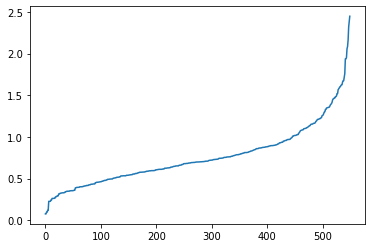

In [49]:
from sklearn.neighbors import kneighbors_graph
import sklearn

dist = sklearn.neighbors.DistanceMetric.get_metric('euclidean')
matsim = dist.pairwise(X_pca)
minPts  = 5 # Fijamos el parámetro minPts
A = kneighbors_graph(X_pca, minPts, include_self=False)
Ar = A.toarray()
seq = []
for i,s in enumerate(X_pca):
    for j in range(len(X_pca)):
        if Ar[i][j] != 0:
            seq.append(matsim[i][j])
seq.sort()
plt.plot(seq)
plt.show()

In [50]:
# realizar diferntes clusters desde 0.5 a 1.75 con intervalos de 0.25 (donde la curva es mas ascendente) 
#De todas formas la disposición de los datos hará que DBSCAN únicamente aisle 
#una zona densa de aquellos elementos que considera outliers
from sklearn.cluster import DBSCAN
import numpy

for eps in numpy.arange(0.5, 1.75, 0.25):
  db = DBSCAN(eps, min_samples=minPts).fit(datanorm)
  core_samples_mask = numpy.zeros_like(db.labels_, dtype=bool)
  core_samples_mask[db.core_sample_indices_] = True
  labels = db.labels_
  n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
  print (eps, n_clusters_)

  #con epsion de 0.5 hay 1 cluster
  #con epsilon de 0.75 hay 1 cluster

0.5 1
0.75 1
1.0 1
1.25 1
1.5 1


In [51]:
db = DBSCAN(eps=0.5, min_samples=minPts).fit(datanorm)
labels = db.labels_
labels
# 0 es un cluster y -1 outliers

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  0,  0,  0])

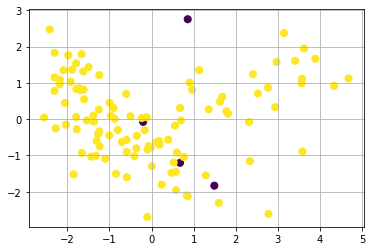

In [52]:
#visualizamos los resultados
#plotting orginal points with color related to label
import matplotlib.pyplot as plt
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels,s=50)
plt.grid()
plt.show()

In [53]:
# -1 son los outliers

df_out2['dbscan_group'] = labels
df_out2[df_out2['dbscan_group'] == -1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,oil,inter,oecd,gdp60,gdp85,gdpgrowth,popgrowth,invest,school,literacy60,clustering jerarquico,dbscan_group
58,yes,no,no,833.0,15584.0,2.6,3.3,15.6,2.7,9.0,4,-1
61,yes,no,no,6731.0,11057.0,6.1,4.1,12.8,3.1,3.0,5,-1
67,yes,no,no,1308.0,18513.0,6.7,3.1,26.5,4.4,68.0,4,-1
114,no,yes,no,5119.0,5495.0,0.9,0.6,11.8,7.0,94.0,5,-1


# Expectation maximitation

In [44]:
#determinar el numero de clusters
from sklearn.mixture import GaussianMixture
import numpy

lowest_bic = numpy.infty
bic = []
best_cv = 'full'
best_k = 3
cv_types = ['spherical', 'tied', 'diag', 'full']
n_components_range = range(1, 7)
for cv_type in cv_types:
    for k in range(1, 7):
        gmm = GaussianMixture(n_components=k, covariance_type=cv_type, init_params='random')
        gmm.fit(X_pca)
        bic.append(gmm.bic(X_pca))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_cv = cv_type
            best_k = k
            
print ("Mejor valor K", best_k, "Mejor tipo de Covarianza", best_cv)

Mejor valor K 4 Mejor tipo de Covarianza spherical


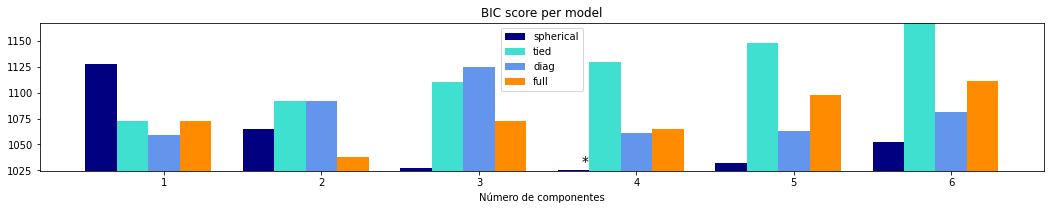

In [45]:
# Plot the BIC scores
import itertools
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])
bars = []
plt.figure(figsize=(18, 6))
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = numpy.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([min(bic) * 1.01 - .01 * max(bic), max(bic)])
plt.title('BIC score per model')
xpos = numpy.mod(numpy.argmin(bic), len(n_components_range)) + .65 +\
    .2 * numpy.floor(numpy.argmin(bic) / len(n_components_range))
plt.text(xpos, min(bic) * 0.97 + .03 * max(bic), '*', fontsize=14)
spl.set_xlabel('Número de componentes')
spl.legend([b[0] for b in bars], cv_types)

In [46]:
#Ejecuto el algoritmo con los mejores parametros
EM = GaussianMixture(n_components=best_k, covariance_type=best_cv, init_params='random')
EM.fit(datanorm)
labels =  EM.predict(datanorm)
n_clusters = best_k - (1 if -1 in labels else 0)

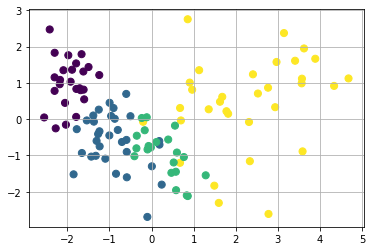

In [47]:
#Visualizo resultados
#plotting orginal points with color related to label
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels,s=50)
plt.grid()
plt.show()